## Image creation

In [1]:
cd ..

/Users/iansharff/Documents/flatiron_ds/phase2/project2/king_county_housing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tools.helpers as th
import tools.data_preparation as dp
import tools.data_visualization as dv

### Style configurations

In [3]:
color_codes = sns.color_palette(palette='mako', n_colors=4)
sns.set_style('darkgrid')



In [4]:
df = pd.read_csv('data/kc_house_data.csv')
final_df = dp.initial_clean(df)
test = th.remove_outliers(final_df, ['price', 'bedrooms', 'bathrooms'])

In [5]:
cols = [
    'sqft_living', 
    'grade', 
    'bedrooms', 
    'bathrooms'
]

labels = [
    'Size of Living Space (sq. ft.)',
    'Property Grade',
    'No. Bedrooms',
    'No. Bathrooms'
]

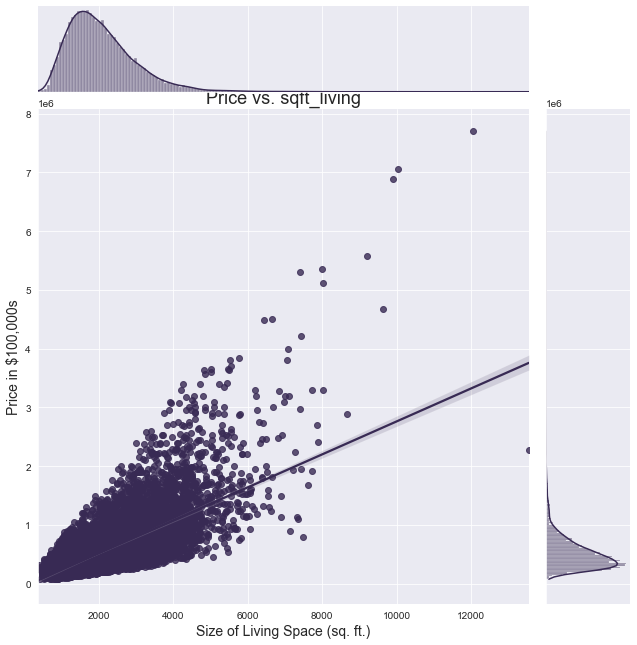

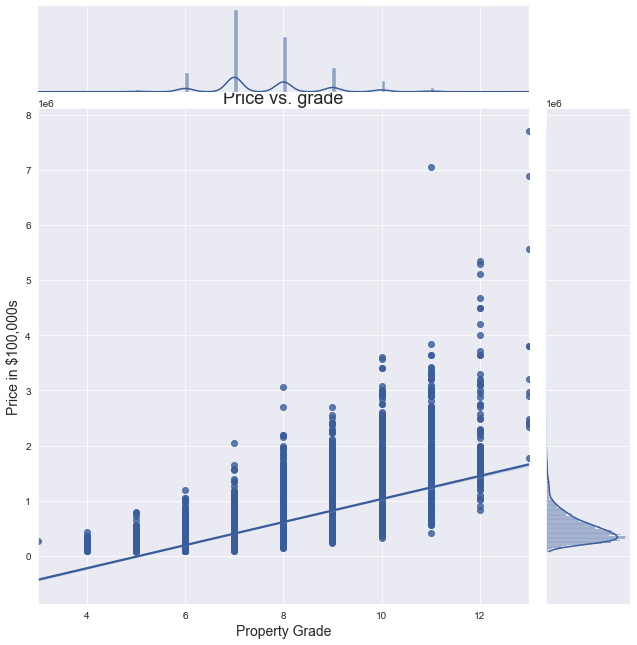

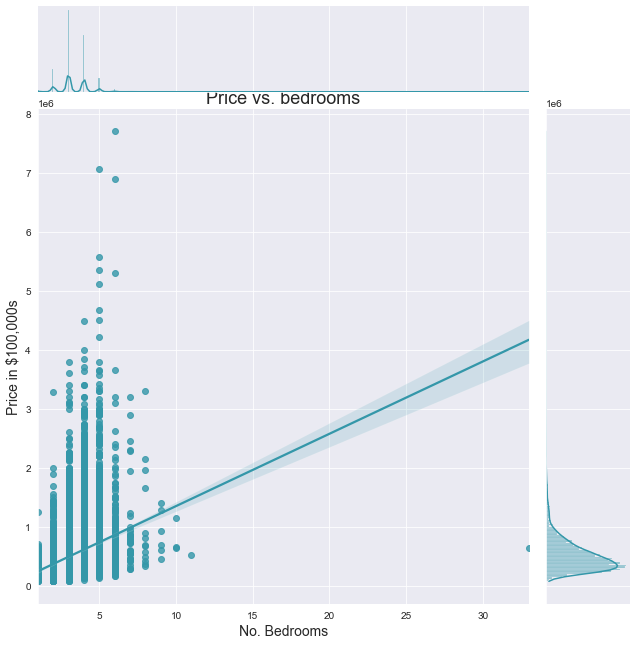

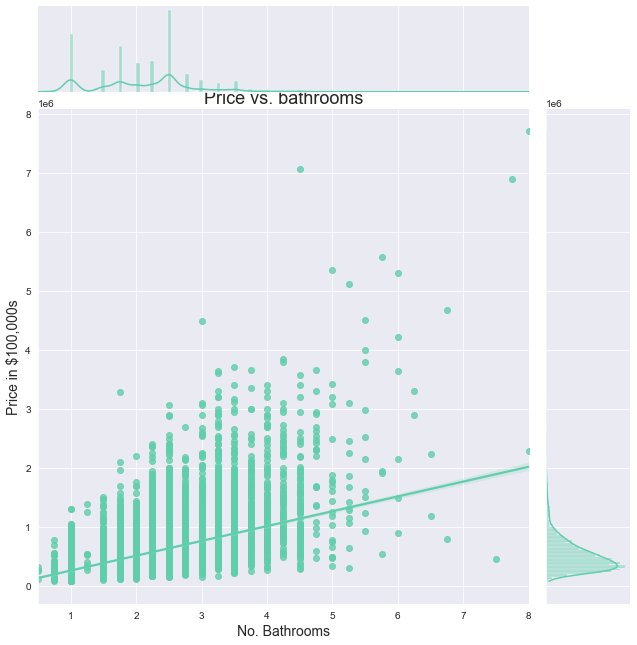

In [6]:
for col, label, color in zip(cols, labels, color_codes):
    jp = sns.jointplot(
        x=col,
        y='price',
        data=final_df,
        kind='reg',
        color=color,
        height=9
    )
    plt.ylabel('Price in $100,000s', size=14)
    plt.xlabel(label, size=14)
    plt.title(f"Price vs. {col}", size=18)
    jp.savefig(f'images/{col}_regplot.png')

In [6]:
sns.color_palette('mako', as_cmap=True)

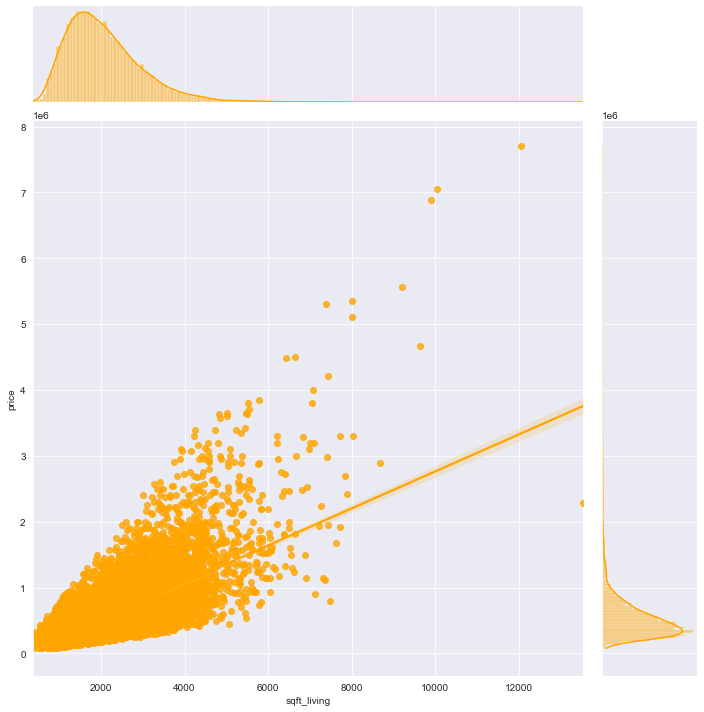

In [32]:
sns.jointplot(
    x='sqft_living',
    y='price',
    data=final_df,
    kind='reg',
    color='orange',
    height=9
)



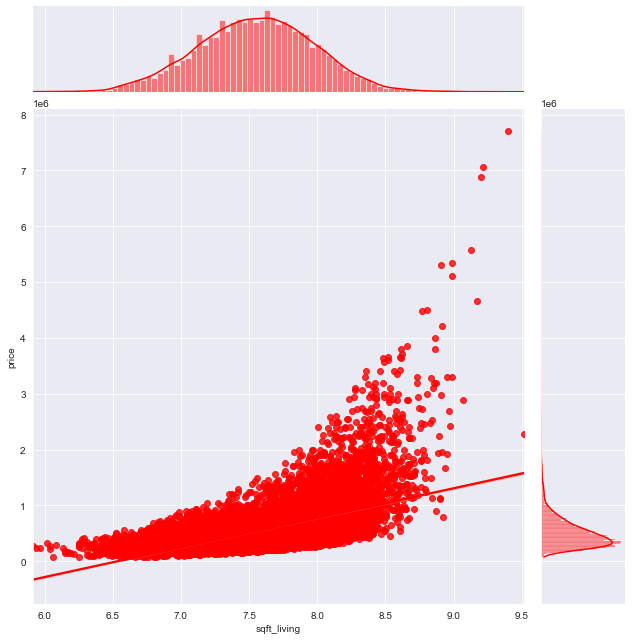

In [34]:
th.log_transform(final_df, 'sqft_living')
th.remove_outliers
sns.jointplot(
    x='sqft_living',
    y='price',
    data=final_df,
    kind='reg',
    color='red',
    height=9
)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,7.073270,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,7.851661,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,6.646391,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,7.580700,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,7.426549,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,7.333023,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2015-02-23,400000.0,4,2.50,7.745003,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,2014-06-23,402101.0,2,0.75,6.927558,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,2015-01-16,400000.0,3,2.50,7.377759,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [1]:
jg = sns.jointplot(
    x='lat',
    y='long',
    data=final_df,
    kind='scatter',
    palette='Reds',
    hue='price',
    height=9,
    ratio=9,
    joint_kws={
        'alpha':0.2})
jg.plot_joint(sns.kdeplot, color='black', zorder=0, levels=6)

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='long', ylabel='lat'>

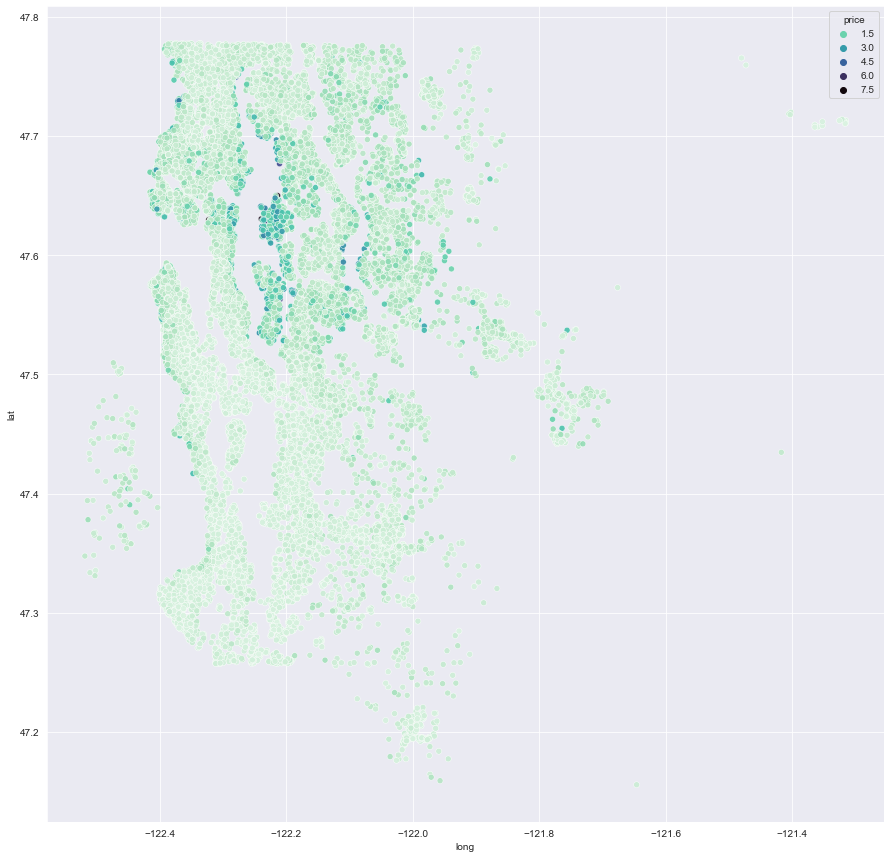

In [28]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(x='long', y='lat', data=final_df, palette=sns.color_palette('mako_r', as_cmap=True), hue='price', alpha=0.9)

In [25]:
final_df['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64